In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import h5py

sys.path.append('../')
import utils
import settings

In [2]:
# barb data structure:
# [0] = tmin
# [1] = tmax
# [2] = fitted energy
# [3] = sigma of the fitted energy (bootstrap)
# [4] = chi^2/dof

In [3]:
#cls vs simon #my data
def get_dataframes( these_files, sub_dir = "" ):
    these_dfs = {}
    if type(these_files)==dict:
        for key in these_files.keys():
            these_dfs[key] = get_dataframes(these_files[key],sub_dir)
        return these_dfs
    else:
        if sub_dir:
            return pd.read_csv(os.path.join(sub_dir,these_files)," ",header=None)
        else:
            return pd.read_csv(these_files," ",header=None)

def compare_data(title, mydata, barbara_pi_data, tminmin = None, tminmax = None ):
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(6)
    plt.style.use('../spectrum.mplstyle')

    my_xdata = mydata[0]
    my_ydata = mydata[1]
    my_yerr_low = mydata[3]
    my_yerr_upp = mydata[2]
    
    b_xdata = barbara_pi_data[0]
    b_ydata = barbara_pi_data[2]
    b_yerr = barbara_pi_data[3]
    if tminmin and tminmax:
        my_xdata = my_xdata[tminmin:tminmax]
        my_ydata = my_ydata[tminmin:tminmax]
        my_yerr_low = my_yerr_low[tminmin:tminmax]
        my_yerr_upp = my_yerr_upp[tminmin:tminmax]
        b_xdata = b_xdata[tminmin:tminmax]
        b_ydata = b_ydata[tminmin:tminmax]
        b_yerr = b_yerr[tminmin:tminmax]  
    elif tminmin:
        my_xdata = my_xdata[tminmin:]
        my_ydata = my_ydata[tminmin:]
        my_yerr_low = my_yerr_low[tminmin:]
        my_yerr_upp = my_yerr_upp[tminmin:]
        b_xdata = b_xdata[tminmin:]
        b_ydata = b_ydata[tminmin:]
        b_yerr = b_yerr[tminmin:]  
    elif tminmax:
        my_xdata = my_xdata[:tminmax]
        my_ydata = my_ydata[:tminmax]
        my_yerr_low = my_yerr_low[:tminmax]
        my_yerr_upp = my_yerr_upp[:tminmax]
        b_xdata = b_xdata[:tminmax]
        b_ydata = b_ydata[:tminmax]
        b_yerr = b_yerr[:tminmax]
    
    plt.errorbar(my_xdata,my_ydata,(my_yerr_low,my_yerr_upp),capsize=5, color=settings.colors[0], marker=settings.markers[0], linewidth=0.0, elinewidth=1.5,label="Sarah")
    plt.errorbar(b_xdata,b_ydata,b_yerr,capsize=5, color=settings.colors[1], marker=settings.markers[1], linewidth=0.0, elinewidth=1.5,label="Barbara")

    plt.xlabel(r"$t_{\textup{min}}/a$")
    plt.ylabel(r"$aE_{\textup{fit}}$")

    plt.legend()
    plt.title(title)
    plt.tight_layout()

In [4]:
my_pi_file_1exp = os.path.join("D200","pis_tmin.dat")
my_pi_file_2exp = os.path.join("D200","pis_tmin2.dat")
my_pi_file_1exp_uncorr = os.path.join("D200","pis_tmin-uncorr.dat")
my_pi_file_2exp_uncorr = os.path.join("D200","pis_tmin2-uncorr.dat")
my_N_file_1exp = os.path.join("D200","Ns_tmin.dat")
my_N_file_2exp = os.path.join("D200","Ns_tmin2.dat")
barb_file = os.path.join("Barbara Data","Single_correlators_bt_bin10_fits.h5")

In [5]:
my_pi_data_1exp = pd.read_csv(my_pi_file_1exp," ",header=None)
my_pi_data_2exp = pd.read_csv(my_pi_file_2exp," ",header=None)
my_pi_data_1exp_uncorr = pd.read_csv(my_pi_file_1exp_uncorr," ",header=None)
my_pi_data_2exp_uncorr = pd.read_csv(my_pi_file_2exp_uncorr," ",header=None)
my_N_data_1exp = pd.read_csv(my_N_file_1exp," ",header=None)
my_N_data_2exp = pd.read_csv(my_N_file_2exp," ",header=None)

In [6]:
barb_file_handler = h5py.File(barb_file,"r")
print(barb_file_handler.keys())
pi_data = barb_file_handler['PSQ0_A1um_S0_P']
N_data = barb_file_handler['PSQ0_G1g_S0_N']
barb_pi_data_1exp = np.array(pi_data['1exp']['Tmin']['Correlated']['Mean'])
barb_pi_data_1exp_uncorr = np.array(pi_data['1exp']['Tmin']['Uncorrelated']['Mean'])
barb_pi_data_2exp = np.array(pi_data['2exp']['Tmin']['Correlated']['Mean'])
barb_pi_data_2exp_uncorr = np.array(pi_data['2exp']['Tmin']['Uncorrelated']['Mean'])
barb_N_data_1exp = np.array(N_data['1exp']['Tmin']['Correlated']['Mean'])
barb_N_data_1exp_uncorr = np.array(N_data['1exp']['Tmin']['Uncorrelated']['Mean'])
barb_N_data_2exp = np.array(N_data['2exp']['Tmin']['Correlated']['Mean'])
barb_N_data_2exp_uncorr = np.array(N_data['2exp']['Tmin']['Uncorrelated']['Mean'])
# print(pi_data['1exp']['Tmin'].keys())
barb_file_handler.close()

<KeysViewHDF5 ['PSQ0_A1u_S1_k', 'PSQ0_A1um_S0_P', 'PSQ0_G1g_S0_N', 'PSQ0_G1g_S1_L', 'PSQ0_G1g_S1_S', 'PSQ0_G1g_S2_X', 'PSQ1_A2_S1_k', 'PSQ1_A2m_S0_P', 'PSQ1_G1_S0_N', 'PSQ1_G1_S1_L', 'PSQ1_G1_S1_S', 'PSQ1_G1_S2_X', 'PSQ2_A2_S1_k', 'PSQ2_A2m_S0_P', 'PSQ2_G_S0_N', 'PSQ2_G_S1_L', 'PSQ2_G_S1_S', 'PSQ2_G_S2_X', 'PSQ3_A2_S1_k', 'PSQ3_A2m_S0_P', 'PSQ3_G_S0_N', 'PSQ3_G_S1_L', 'PSQ3_G_S1_S', 'PSQ3_G_S2_X', 'PSQ4_A2_S1_k', 'PSQ4_G1_S0_N', 'PSQ4_G1_S1_L', 'PSQ4_G1_S1_S', 'PSQ4_G1_S2_X']>


In [7]:
####pi#########

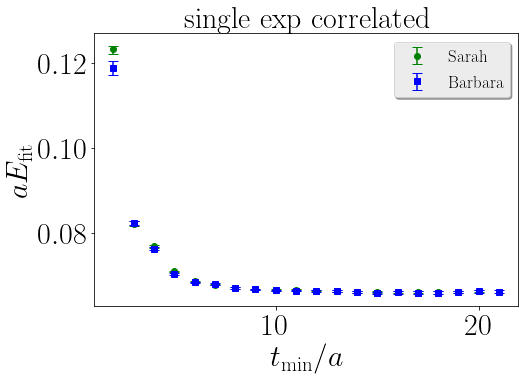

In [8]:
compare_data("single exp correlated", my_pi_data_1exp, barb_pi_data_1exp )


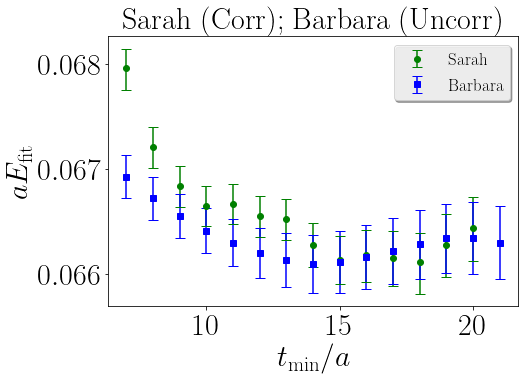

In [9]:
compare_data("Sarah (Corr); Barbara (Uncorr)", my_pi_data_1exp, barb_pi_data_1exp_uncorr,5,20 )


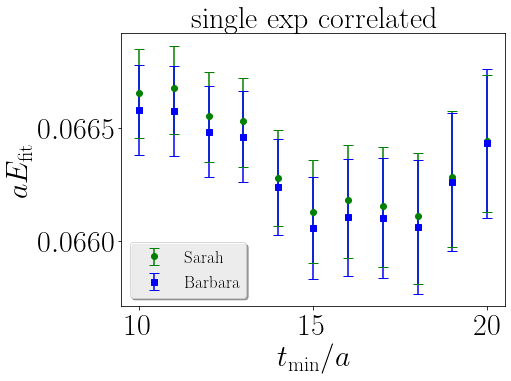

In [10]:
compare_data("single exp correlated", my_pi_data_1exp, barb_pi_data_1exp, 8,19)


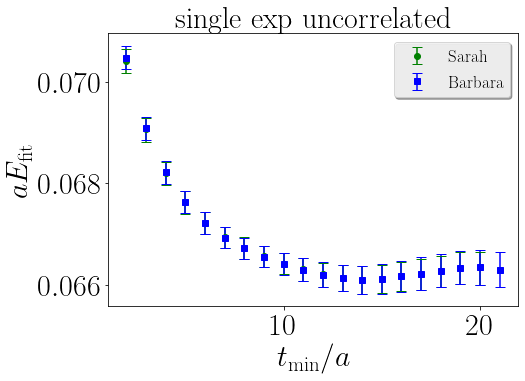

In [11]:
compare_data("single exp uncorrelated", my_pi_data_1exp_uncorr, barb_pi_data_1exp_uncorr )


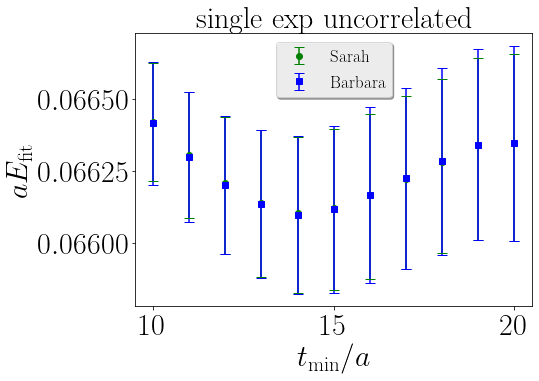

In [12]:
compare_data("single exp uncorrelated", my_pi_data_1exp_uncorr, barb_pi_data_1exp_uncorr, 8,19 )


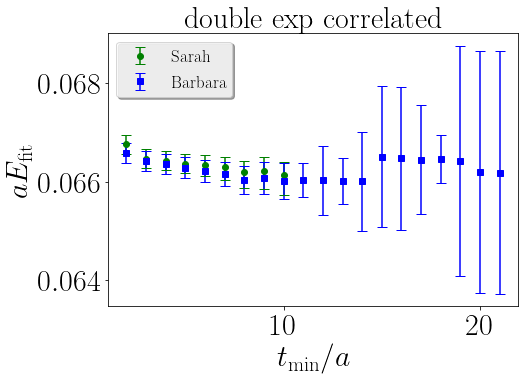

In [13]:
compare_data("double exp correlated", my_pi_data_2exp, barb_pi_data_2exp )

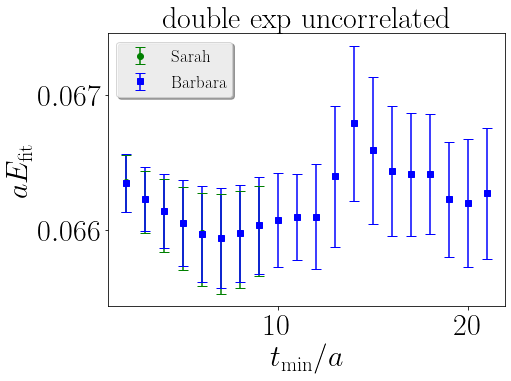

In [14]:
compare_data("double exp uncorrelated", my_pi_data_2exp_uncorr, barb_pi_data_2exp_uncorr )

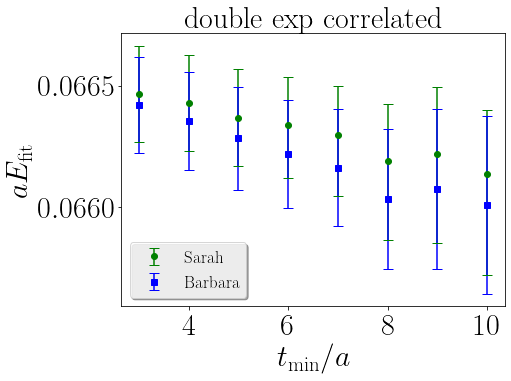

In [15]:
compare_data("double exp correlated", my_pi_data_2exp, barb_pi_data_2exp, 1, 9 )

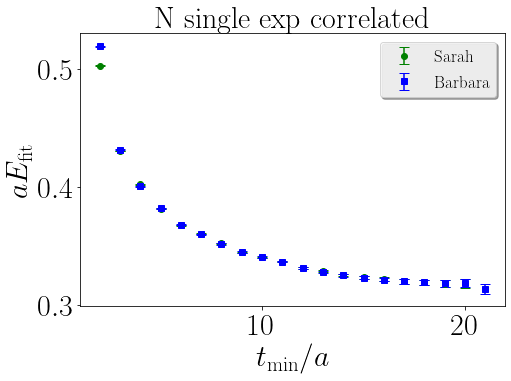

In [18]:
compare_data("N single exp correlated", my_N_data_1exp, barb_N_data_1exp )

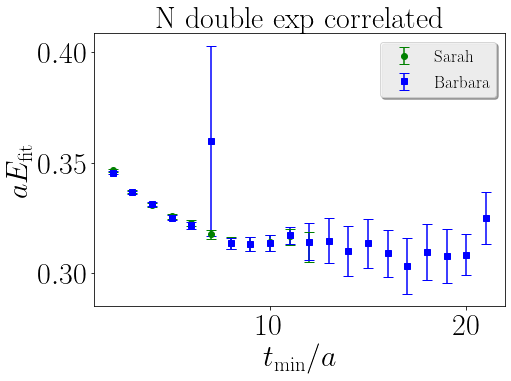

In [19]:
compare_data("N double exp correlated", my_N_data_2exp, barb_N_data_2exp )